# The Notebook script for our defense method

In [ ]:
! pip install -r build_env/requirements.txt
! pip install git+https://github.com/kornia/kornia

In [1]:
import sys
sys.path.insert(1, 'cleanAgent')

import torch
import numpy as np
import kornia

from victim_model import get_victim
from dataset import read_image_tensor

dataset = 'imagenet'
net = 'resnet101'

device =  torch.device('cuda:0') if torch.cuda.is_available() else 'cpu'

victim = get_victim(dataset, net, device)
from defender import Defender

defense= Defender(
    victim=victim,
    num_iter=3000, 
    num_save=200,
    reg_noise_std=1/100.0,
    input_depth=4,
    n33d_n33u_n11s_ns=[64, 64, 4, 5],
    x_noise_std=0.0,
    loss='mse'
)

Loading resnet101 network pretrained on imagenet dataset
Num_iter/save: 3000/201
Net: [64, 64, 4, 5]
Input_depth: 4
Reg/x_noise_std: 0.01/0.0
Net Loss: mse
Number of params: 556215


Predict of Clean Image: 990


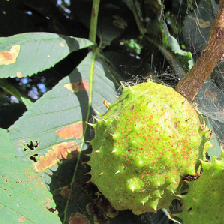

In [2]:
clean_fpath = './datas/clean_imgs/00005.png'
adv_fpath = './datas/adv_imgs/00005.png'

images = read_image_tensor(clean_fpath).to(device)
adv_images = read_image_tensor(adv_fpath).to(device)

output = victim(images)
output = torch.argmax(output, dim=1)
print(f'Predict of Clean Image: {output.item()}')

from IPython.display import Image
Image(clean_fpath)

Predict of Adv Image: 852


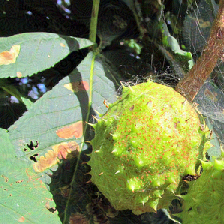

In [3]:
output = victim(adv_images)
output = torch.argmax(output, dim=1)
print(f'Predict of Adv Image: {output.item()}')
Image(adv_fpath)

# DIP Optimization: 1
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
Predict of reconstructed Image: 990


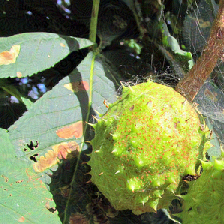

In [4]:
rec_images = defense(adv_images)
output = victim(rec_images)
output = torch.argmax(output, dim=1)
print(f'Predict of reconstructed Image: {output.item()}')
from torchvision.utils import save_image
rec_images = adv_images
save_image(rec_images, 'datas/rec_images.png')
Image('datas/rec_images.png')